<a href="https://colab.research.google.com/github/znjubery/hpc-ai-intro_2025/blob/main/Random_Forest_Basic_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification on Iris Dataset

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species.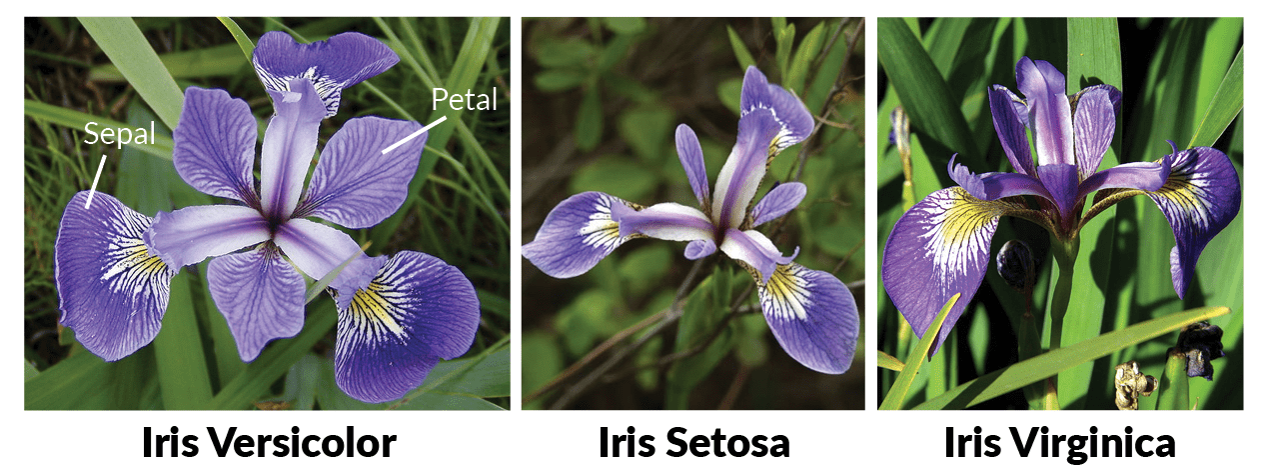


## Step 1: Load and Visualize Dataset

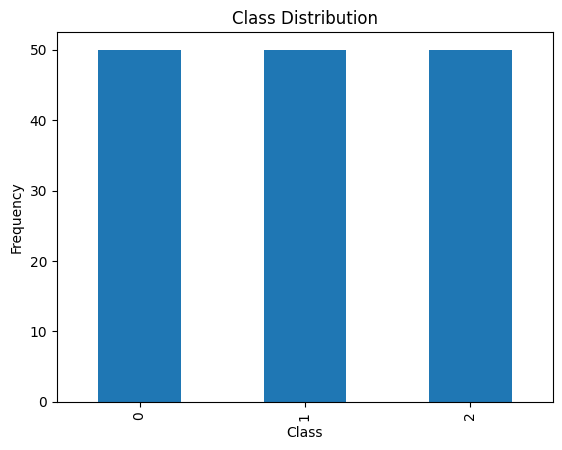

In [ ]:

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Visualize class distribution
df['target'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


## Step 2: Split Dataset

In [ ]:

from sklearn.model_selection import train_test_split

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Train and test sets created.")


Train and test sets created.


## Step 3: Train Random Forest Model

In [ ]:

from sklearn.ensemble import RandomForestClassifier
import time

# Train Model
start_time = time.time()
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")


Training Time: 0.26 seconds


## Step 4: Evaluate Model

In [ ]:

from sklearn.metrics import classification_report, accuracy_score

# Evaluate Model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



## Step 5: Feature Importances

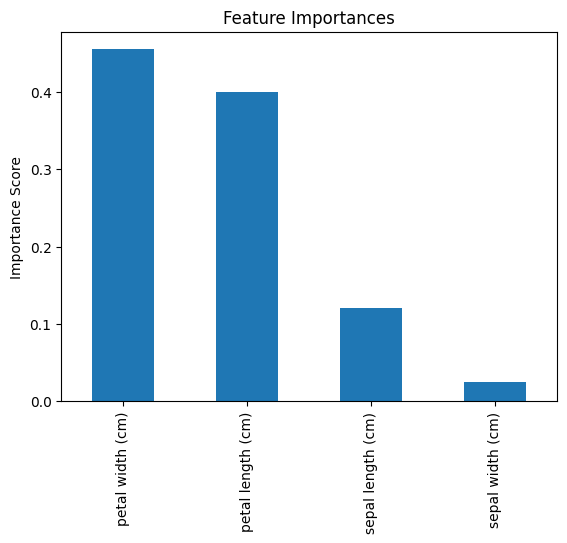

In [ ]:

# Visualize Feature Importances
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_importances.plot(kind='bar', title="Feature Importances")
plt.ylabel("Importance Score")
plt.show()
